## TASK 4 - regression method as a Neural Network

    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 


In [30]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split

In [84]:
import warnings
warnings.filterwarnings('ignore')

## General Architecture of the algorithm ##


Build a Logistic Regression, using a Neural Network mindset.

**Logistic Regression is actually a very simple Neural Network!**


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

Key steps:

  -Initialize the parameters of the model

  -Learn the parameters for the model by minimizing the cost  

  -Use the learned parameters to make predictions (on the test set)
  
  -Analyse the results and conclude

## The data - bioresponse

In [2]:
#loading the data
data = pd.read_csv("bioresponse.csv", header=0, sep=',')

In [3]:
data.tail(10)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
3741,0,0.066700,0.500446,0.15,0.0,0.134701,0.645594,0.256110,0.219558,0.729921,...,0,0,0,0,0,0,0,0,0,0
3742,0,0.200000,0.583884,0.05,0.0,0.138530,0.740136,0.170377,0.376302,0.797697,...,0,0,0,0,0,0,0,0,0,0
3743,0,0.133333,0.765646,0.15,0.0,0.354546,0.564943,0.220880,0.435728,0.487883,...,0,0,0,0,0,0,0,0,0,0
3744,0,0.033300,0.500483,0.00,0.0,0.390184,0.734103,0.236868,0.203155,0.802258,...,0,0,0,0,0,0,0,0,0,0
3745,1,0.066700,0.842546,0.00,0.0,0.305172,0.700507,0.284378,0.556145,0.725174,...,0,0,0,0,0,0,0,0,0,0
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0
3750,0,0.133333,0.533952,0.00,0.0,0.347966,0.757971,0.230667,0.272652,0.854116,...,0,0,0,0,0,0,0,0,0,0


### Preparing the subsamples for the model

In [4]:
target = data.Activity.values
data.drop(['Activity'], axis=1, inplace=True)

In [5]:
#spliting the sample to train and test 75-25
np.random.seed(22)
x_train,x_test,y_train,y_test=train_test_split(data,target, test_size=0.25)

In [6]:
#transponding
x_train=np.asarray(x_train).T
y_train=np.asarray(y_train).T
x_test=np.asarray(x_test).T
y_test=np.asarray(y_test).T

## Parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features, number of layers, number of neurons in the layer etc.) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### Sigmoid

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

#### Function that computes the sigmoid of z 

In [7]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

#### Initializing the parameters with zeros

In [8]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

### Forward and Backward propagation

Implement a function `propagate()` that computes the cost function and its gradient.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we should use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [9]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1) # compute cost
    #cost = -(1./m) * np.sum(Y * np.log(A + 1e-15) + (1 - Y) * np.log(1 - A + 1e-15), axis=1)

    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [10]:
w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


### Optimization
- We have initialized the parameters.
- We are able to compute a cost function and its gradient.
- Now, we have to update the parameters using gradient descent.

For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [11]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,"b": b}
    
    grads = {"dw": dw,"db": db}
    
    return params, grads, costs

Implement the `predict()` function. There are two steps to compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5), store the predictions in a vector `Y_prediction`. 

In [12]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction


Already have:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## Merge it all into a model ##

    - Y_prediction_test for the predictions on the test set
    - Y_prediction_train for the predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [73]:
# model with basic gradient descent optimization

def model_gd(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Training the model with the Gradient descent optimization function

In [74]:
result_gd=model_gd(x_train,y_train,x_test,y_test, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.630746
Cost after iteration 200: 0.599814
Cost after iteration 300: 0.578498
Cost after iteration 400: 0.562446
Cost after iteration 500: 0.549698
Cost after iteration 600: 0.539218
Cost after iteration 700: 0.530395
Cost after iteration 800: 0.522829
Cost after iteration 900: 0.516247
Cost after iteration 1000: 0.510453
Cost after iteration 1100: 0.505300
Cost after iteration 1200: 0.500676
Cost after iteration 1300: 0.496495
Cost after iteration 1400: 0.492690
Cost after iteration 1500: 0.489205
Cost after iteration 1600: 0.485995
Cost after iteration 1700: 0.483026
Cost after iteration 1800: 0.480266
Cost after iteration 1900: 0.477691
train accuracy: 78.99040170636331 %
test accuracy: 75.26652452025587 %


## Stochastic Gradient Descent (SGD) optimization function

In [75]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    m = X.shape[1]
    
#picking random samples 
    for i in range(num_iterations):
        a = np.random.randint(X.shape[1], size=64)
        X_ran = []
        Y_ran = []
        for j in a:
            X_ran.append(X.T[j])
            Y_ran.append(Y[j])
            
        X_ran = np.array(X_ran)
        Y_ran = np.array(Y_ran)
        grads, cost = propagate(w, b, X_ran.T, Y_ran)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Update rule
        w -= learning_rate * dw
        b -= learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

## The model with SGD

In [76]:
# model with sgd

def model_sgd(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True):
        
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    #sgd
    parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Training the model with the Stochastic Gradient Descent (SGD) optimization function

In [77]:
result_sgd=model_sgd(x_train,y_train,x_test,y_test)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.630500
Cost after iteration 200: 0.567551
Cost after iteration 300: 0.621657
Cost after iteration 400: 0.577570
Cost after iteration 500: 0.506232
Cost after iteration 600: 0.584906
Cost after iteration 700: 0.497061
Cost after iteration 800: 0.532521
Cost after iteration 900: 0.528937
Cost after iteration 1000: 0.570342
Cost after iteration 1100: 0.467263
Cost after iteration 1200: 0.464096
Cost after iteration 1300: 0.511290
Cost after iteration 1400: 0.472720
Cost after iteration 1500: 0.458793
Cost after iteration 1600: 0.507788
Cost after iteration 1700: 0.489513
Cost after iteration 1800: 0.472075
Cost after iteration 1900: 0.522535
train accuracy: 79.02595094205475 %
test accuracy: 75.69296375266525 %


## Adam optimization method

In [78]:
from math import isnan
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, betta1=0.9, betta2=0.999, eps=1e-8):

    costs = []
    
    vdw,vdb = initialize_with_zeros(X.shape[0])
    sdw,sdb = initialize_with_zeros(X.shape[0])

    for i in range(1, num_iterations):
  
        grads, cost = propagate(w, b, X, Y)
        if isnan(cost):
            break

        dw = grads["dw"]
        db = grads["db"]
        
        vdw = betta1*vdw + (1-betta1)*dw
        sdw = betta2*sdw + (1-betta2)*dw**2
        vdb = betta1*vdb + (1-betta1)*db
        sdb = betta2*sdb + (1-betta2)*db**2

        w -= learning_rate*(vdw/(1 - betta1**i))/(np.sqrt(sdw/(1 - betta2**i)) + eps)
        b -= learning_rate*(vdb/(1 - betta1**i))/(np.sqrt(sdb/(1 - betta2**i)) + eps)
        
        # Record the costs
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if i % 100 == 0 and print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    
    grads = {"dw": dw,"db": db}
    
    return params, grads, costs

In [79]:
def model_ad(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.01, print_cost = True):
        
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    #adam
    parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [85]:
result_adam=model_ad(x_train,y_train,x_test,y_test)

Cost after iteration 100: 0.383964
Cost after iteration 200: 0.332124
Cost after iteration 300: 0.301774
Cost after iteration 400: 0.280462
Cost after iteration 500: 0.264207
Cost after iteration 600: 0.251147
Cost after iteration 700: 0.240256
Cost after iteration 800: 0.230915
Cost after iteration 900: 0.222727
Cost after iteration 1000: 0.215427
Cost after iteration 1100: 0.208830
Cost after iteration 1200: 0.202806
Cost after iteration 1300: 0.197256
Cost after iteration 1400: 0.192106
train accuracy: 92.8190543903306 %
test accuracy: 74.09381663113007 %


## Plotting the learning curve for the three optimization methods

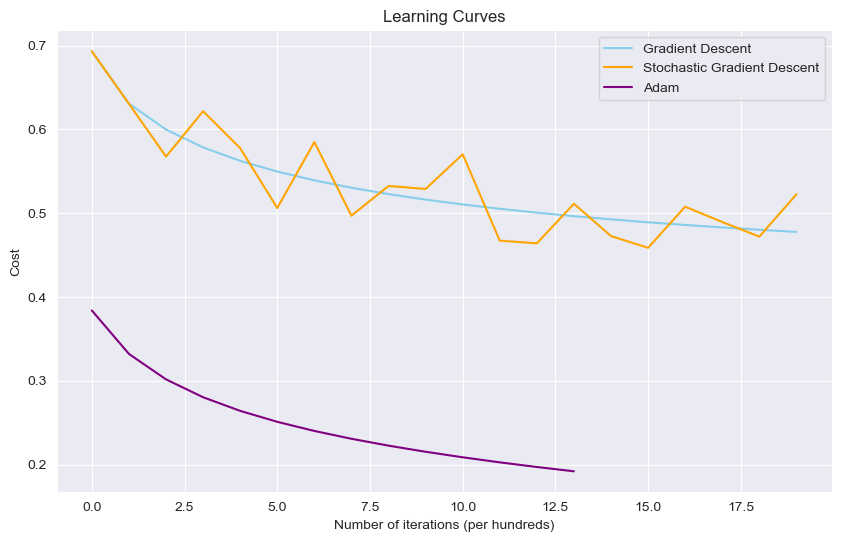

In [81]:
#setting the visualization  style
sns.set_style('darkgrid')
sns.set_palette('mako')

def plot_learning_curves(costs,label, color):
    plt.plot(costs, label=label, color=color)


# result_gd, result_sgd, result_adam are dictionaries with "costs" and "learning_rate"

plt.figure(figsize=(10, 6))

# Assign specific colors to each curve
plot_learning_curves(result_gd["costs"],"Gradient Descent", 'skyblue')
plot_learning_curves(result_sgd["costs"], "Stochastic Gradient Descent", 'orange')
plot_learning_curves(result_adam["costs"],"Adam", 'purple')

plt.ylabel('Cost')
plt.xlabel('Number of iterations (per hundreds)')
plt.title("Learning Curves")
plt.legend()
plt.show()


## Testing different learning rates vs accuracy of the model

In [87]:
results = []

models = (model_gd, model_sgd, model_ad)
optimizers = ['Gradient Descent', 'Stochastic Gradient Descent', 'Adam']
learning_rates = [0.0001,0.001, 0.01, 0.05, 0.1] #5 learning rates we are testing 

for i in range(len(optimizers)):
    accuracy_values = []  
    
    for j in learning_rates:
        #print(f"\n{optimizers[i]}, learning rate = {j}:\n")
        model = models[i](x_train, y_train, x_test, y_test, num_iterations=2000, learning_rate=j, print_cost=False)
        
        # calculating test accuracy for the dataframe
        test_accuracy = format(100 - np.mean(np.abs(model['Y_prediction_test'] - y_test)) * 100)

        accuracy_values.append(test_accuracy)

    results.append(accuracy_values)

# dataframe creation
df = pd.DataFrame(results, columns=learning_rates, index=optimizers)

#transposing the dataframe to have learning rates as columns and optimizers as rows
df = df.T

df


train accuracy: 55.20796302879488 %
test accuracy: 51.38592750533049 %
train accuracy: 72.27159616068255 %
test accuracy: 68.65671641791045 %
train accuracy: 78.99040170636331 %
test accuracy: 75.26652452025587 %
train accuracy: 81.3722004976893 %
test accuracy: 76.97228144989339 %
train accuracy: 83.07856381087807 %
test accuracy: 77.71855010660981 %
train accuracy: 55.24351226448631 %
test accuracy: 51.38592750533049 %
train accuracy: 72.62708851759687 %
test accuracy: 69.29637526652452 %
train accuracy: 78.59936011375756 %
test accuracy: 74.84008528784648 %
train accuracy: 81.54994667614646 %
test accuracy: 77.61194029850746 %
train accuracy: 82.79416992534661 %
test accuracy: 77.61194029850746 %
train accuracy: 81.94098826875222 %
test accuracy: 76.97228144989339 %
train accuracy: 89.83291859225027 %
test accuracy: 75.47974413646055 %
train accuracy: 92.8190543903306 %
test accuracy: 74.09381663113007 %
train accuracy: 92.28581585495913 %
test accuracy: 74.52025586353945 %
train ac

,Gradient Descent,Stochastic Gradient Descent,Adam
0.0001,51.38592750533049,51.38592750533049,76.97228144989339
0.0010,68.65671641791045,69.29637526652452,75.47974413646055
0.0100,75.26652452025587,74.84008528784648,74.09381663113007
0.0500,76.97228144989339,77.61194029850746,74.52025586353945
0.1000,77.71855010660981,77.61194029850746,51.279317697228144


## Conclusion

To sum up, out of the three different version of the model - the one that uses Adam as an optimization method is the most efficient, showing the fastest convergence. The models are compared having parameters like number of iterations and learning rates the same across the board.

We conducted testing with five distinct learning rates and compared their performance based on test sample accuracy, where higher accuracy is preferable. 

The optimal learning rate for both Gradient Descent and for Stochastic Gradient Descent is  0.1, for the Adam method it is 0.0001.
This difference highlights the adaptability of the Adam method, which achieves faster convergence with a more conservative learning rate.

When comparing the accuracy of the models at their best - Gradient Descent is the most accurate to predict on the test sample, the Stochastic Gradient Descent is the second most accurate, Adam method comming third. It's quite tipicall to have a trade-off, either a better accuracy or a faster convergence. It is hard to have the best of bith worlds. However, it is important to mention that we have not tested all of the possible learning rates, so there is a possibility that it is not the best possible performance of the models. 

In practical machine learning, it is crucial to select the appropriate optimization method and fine-tune the parameters of the model to allow it to perform at its peak. The selection of a particular method depends on the data and task at hand.